In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [9]:
## GOAL: using basic health information to predict obstructive sleep apnea from adults


In [10]:
UserInfo = pd.read_csv('/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/data/shhs1-dataset-0.13.0.csv')

In [5]:
HRV = pd.read_csv('/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/data/shhs1-hrv-summary-0.13.0.csv')

In [12]:
UserInfo.head()

,nsrrid,pptid,ecgdate,lvh3_1,lvh3_3,st4_1_3,st5_1_3,lvhst,mob1,part2deg,...,Abdoqual,EEG1qual,EEG2qual,EOGRqual,EOGLqual,Chinqual,Oximqual,Posqual,LightOff,rcrdtime
0,200001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,3,3,4,4,4,4,4,1.0,7:16:00
1,200002,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,3,2,2,2,2,4,4,NaN,9:00:00
2,200003,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,4,4,4,4,4,4,4,1.0,7:10:00
3,200004,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3,3,3,3,3,3,3,0.0,5:58:00
4,200005,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4,4,4,4,4,4,4,0.0,7:57:00


In [13]:
HRV.head()

,nsrrid,visitnumber,NN_RR,AVNN,IHR,SDNN,SDANN,SDNNIDX,rMSSD,pNN10,...,pNN40,pNN50,tot_pwr,ULF,VLF,LF,HF,LF_HF,LF_n,HF_n
0,200079,1,0.961807,837.411,71.649405,73.9937,35.5148,62.5249,45.6241,67.3536,...,14.91010,11.19200,5728.58,1530.100,2272.210,1245.5700,680.702,1.829830,0.646622,0.353378
1,200082,1,0.999420,1028.170,58.356108,90.3955,54.9141,64.5298,41.9336,73.7959,...,15.55290,9.69490,8929.86,3547.980,3630.750,1231.4700,519.661,2.369760,0.703243,0.296757
2,200108,1,0.998760,812.342,73.860517,81.4281,67.4859,39.9798,30.3975,52.3310,...,3.28497,1.90112,7151.61,5288.530,1028.700,556.6710,277.707,2.004530,0.667169,0.332831
3,200109,1,0.993476,767.980,78.127035,38.7462,28.2819,21.7253,31.6957,31.0473,...,13.30980,8.20251,1400.46,967.256,187.011,89.2684,156.926,0.568857,0.362593,0.637407
4,200112,1,0.999960,969.661,61.877295,104.8600,40.3172,91.4384,89.8815,86.5691,...,50.90980,44.09620,11064.10,2280.930,4194.830,2949.4300,1638.920,1.799620,0.642808,0.357192


In [14]:
HRV = HRV.drop('visitnumber', axis=1)

In [15]:
# UserInfo.dtypes

# # demographic information
# # age_category_s1: Age at Sleep Heart Health Study Visit One (SHHS1)
# age_s1: Age at Sleep Heart Health Study Visit One (SHHS1)
# educat: Education level (Sleep Heart Health Study Visit One (SHHS1))
# ethnicity: Ethnicity
# gender: Gender
# mstat: Marital Status (Sleep Heart Health Study Visit One (SHHS1))
# race: Race

# # basic measurements:
# bmi_s1: Body mass index (BMI) (Sleep Heart Health Study Visit One (SHHS1))
# height: Height (Sleep Heart Health Study Visit One (SHHS1))
# hip: Hip Circumference (Sleep Heart Health Study Visit One (SHHS1))
# waist: Waist Circumference (Sleep Heart Health Study Visit One (SHHS1))
# weight: Weight (Sleep Heart Health Study Visit One (SHHS1))
# diasbp: Average Diastolic blood pressure (BP) (Sleep Heart Health Study Visit One (SHHS1))
# systbp: Average Systolic blood pressure (BP) (Sleep Heart Health Study Visit One (SHHS1))

# # Medications:
# insuln1: Insulins (Sleep Heart Health Study Visit One (SHHS1))
# istrd1: Inhaled steroids for asthma (Sleep Heart Health Study Visit One (SHHS1))
# ntca1: Non-Tricyclic Antidepressants Other Than monoamine oxidase inhibitor (MAOI) (Sleep Heart Health Study Visit One (SHHS1))
# tca1: Tricylic Anti-Depressants (Sleep Heart Health Study Visit One (SHHS1))
# asa1: Aspirin From 280804 (Anti-Inflam Agents) (Sleep Heart Health Study Visit One (SHHS1))

# # Medical history: 
# alcoh: Alcohol use (Sleep Heart Health Study Visit One (SHHS1))
# cgpkyr: Cigarette pack-years (Sleep Heart Health Study Visit One (SHHS1))
# htnderv_s1: Hypertension (HTN) (Sleep Heart Health Study Visit One (SHHS1))    
# parrptdiab: History of Diabetes (Sleep Heart Health Study Visit One (SHHS1))    
# asthma15: History of Asthma (Sleep Heart Health Study Visit One (SHHS1))
# asth1215: Asthma attack in last 12 months (Sleep Heart Health Study Visit One (SHHS1))
# cough315: Coughing on most days (Sleep Heart Health Study Visit One (SHHS1))
# crbron15: History of Chronic Bronchitis (Sleep Heart Health Study Visit One (SHHS1))  
# sinus15: Sinus trouble (Sleep Heart Health Study Visit One (SHHS1))
# runny15: Runny or stuffy nose (Sleep Heart Health Study Visit One (SHHS1))
# prev_hx_stroke: Previous history of stroke
# prev_hx_mi: Previous history of myocardial infarction (MI)
# phlegm15: Bring up phlegm (Sleep Heart Health Study Visit One (SHHS1))
# pacem15: History of Pacemaker (Sleep Heart Health Study Visit One (SHHS1))
    
# # advanced measurement
# pctlt90: Percent of sleep time with less than 90% oxygen saturation (SaO2)
# avnn: Mean of all normal sinus to normal sinus interbeat intervals (NN) 	
# ihr: Instantaneous heart rate
# nn_rr: Ratio of consecutive normal sinus beats (NN) over all cardiac inter-beat (RR) intervals
# sdann: Standard deviation of the averages of normal sinus to normal sinus interbeat (NN) intervals in all 5-minute segments
# sdnn: Standard deviation of all normal sinus to normal sinus interbeat (NN) intervals
# sdnnidx: Mean of the standard deviations of normal sinus to normal sinus interbeat (NN) intervals in all 5-minute segments

# # Questionares:
# skrctnae: Adverse Events (Sleep Heart Health Study Visit One (SHHS1)): Skin reaction?
# tripae: Adverse Events (Sleep Heart Health Study Visit One (SHHS1)): Tripping/falling?
# incar02: Sleep Habits (Sleep Heart Health Study Visit One (SHHS1)): Fall asleep while in a car
#         What is chance that you would doze off or fall asleep while in a car, while stopped for a few minutes in traffic?
# lydwn02: Sleep Habits (Sleep Heart Health Study Visit One (SHHS1)): Fall asleep while lying down in the afternoon
#         What is chance that you would doze off or fall asleep while lying down to rest in the afternoon when circumstances permit?
# pgrcar02: Sleep Habits (Sleep Heart Health Study Visit One (SHHS1)): Fall asleep while a passenger in a car
#         What is chance that you would doze off or fall asleep while as a passenger in a car for an hour without a break?
# sitlch02: Sleep Habits (Sleep Heart Health Study Visit One (SHHS1)): Fall asleep while sitting quietly after lunch
#         What is the chance that you would doze off or fall asleep while sitting quietly after a lunch without alcohol?
# sitpub02: Sleep Habits (Sleep Heart Health Study Visit One (SHHS1)): Fall asleep while sitting inactive in a public place
#         What is the chance that you would doze off or fall asleep while sitting inactive in a public place?
# sitrd02: Sleep Habits (Sleep Heart Health Study Visit One (SHHS1)): Fall asleep while sitting and reading
#         What is the chance that you would doze off or fall asleep while sitting and reading?
# sittlk02:Sleep Habits (Sleep Heart Health Study Visit One (SHHS1)): Fall asleep while sitting and talking
#         What is the chance that you would doze off or fall asleep while sitting and talking to someone?
# watv02: Sleep Habits (Sleep Heart Health Study Visit One (SHHS1)): Fall asleep while watching TV
#         What is chance that you would doze off or fall asleep while watching TV?     
# asa15: Health Interview (Sleep Heart Health Study Visit One (SHHS1)): Aspirin in last 2 weeks
#         In last two weeks, did you take any aspirin or aspirin containing meds?       
# asalw15: Health Interview (Sleep Heart Health Study Visit One (SHHS1)): days taken aspirin in last week
#         How many days did you take aspirin or aspirin containing meds in last week? (number of days, 1 to 14)        
# avesmk15: 
# beer15
# cigday15
# coffee15
# evsmok15
# ang15
# napshr15
# napsmn15
# ns1yr15
# shots15
# slpill15
# smknow15
# soda15
# stress15
# tea15
# wine15
# yrsns15
# beer10
# cgrtts10
# cigars10
# coffee10
# bathe25
# bdpain25
# bend25
# blue25
#     calm25
#     carful25
#     climb125
#     climbs25
#     cmp1yr25
#     nrvous25
#     date25
#     down25
# probsa25
#     sickez25
#     tired25
#     HvSnrd02

#         target
# oai0p: Obstructive Apnea Index - number of [obstructive apneas] per hour of sleep

In [16]:
UserInfo['oai0p'].shape

(5804,)

(array([4.036e+03, 5.190e+02, 2.310e+02, 1.190e+02, 5.800e+01, 4.900e+01,
        3.200e+01, 1.800e+01, 1.100e+01, 9.000e+00, 8.000e+00, 5.000e+00,
        2.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  0.        ,   5.31584949,  10.63169897,  15.94754846,
         21.26339795,  26.57924743,  31.89509692,  37.21094641,
         42.5267959 ,  47.84264538,  53.15849487,  58.47434436,
         63.79019384,  69.10604333,  74.42189282,  79.7377423 ,
         85.05359179,  90.36944128,  95.68529077, 101.00114025,
        106.31698974]),
 <a list of 20 Patch objects>)

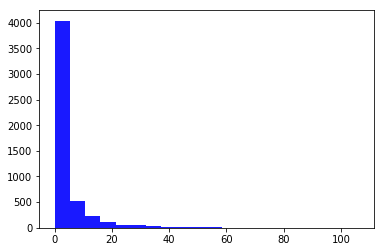

In [17]:
plt.hist(UserInfo['oai0p'].dropna(), bins = 20, alpha=0.9, color='blue')

In [18]:
UserInfo['oai0p'].head()

0    0.319574
1         NaN
2    0.836820
3    1.196013
4    0.324324
Name: oai0p, dtype: float64

In [19]:
UserInfo.shape

(5804, 1279)

In [20]:
UserInfo['oai0p'].isnull().sum()

698

In [21]:
UserInfoClean = UserInfo.dropna(subset = ['oai0p'])

In [22]:
UserInfoClean.shape

(5106, 1279)

In [27]:
ID = ['nsrrid']
demographics = ['educat','ethnicity','MStat','race']
measurements = ['height','Hip','waist','weight','DiasBP','SystBP']
medicalH1 = [x.upper() for x in ['insuln1','istrd1','ntca1','asa1']]
medicalH2 = ['Alcoh','CgPkYr','ParRptDiab','prev_hx_mi','prev_hx_stroke']
medicalH3 = [x.upper() for x in ['asthma15','asth1215','cough315','crbron15','sinus15','runny15','phlegm15',
             'pacem15','skrctnae','tripae']]
Questionares1 = ['InCar02','LyDwn02','PgrCar02','SitLch02','SitPub02','SitRd02','SitTlk02',
                'WaTV02','date25','lang15','HOSnr02','HOStBr02','HTNDerv_s1']
Questionares = [x.upper() for x in ['asa15','asalw15','avesmk15','beer15','evsmok15','napshr15'
                ,'napsmn15','ns1yr15','shots15','slpill15','smknow15','soda15','stress15',
                'tea15','wine15','yrsns15','beer10','cgrtts10','cigars10','coffee10','bathe25'
                ,'bdpain25','bend25','blue25','calm25','carful25','climb125','climbs25',
                'cmp1yr25','nrvous25','down25','probsa25','sickez25']]
Target = ['oai0p']
STOP_BANG = ['HvSnrd02','TIRED25','StpBrt02','SRHype','bmi_s1','age_s1','NECK20','gender']

In [28]:
initFeatures = ID + demographics + measurements + medicalH1 + medicalH2 + medicalH3 + Questionares1 + Questionares + STOP_BANG + Target
# initFeatures = demographics + measurements + medicalH1 + medicalH2 + medicalH3 + Questionares + Questionares1

In [29]:
initFeatures

['nsrrid',
 'educat',
 'ethnicity',
 'MStat',
 'race',
 'height',
 'Hip',
 'waist',
 'weight',
 'DiasBP',
 'SystBP',
 'INSULN1',
 'ISTRD1',
 'NTCA1',
 'ASA1',
 'Alcoh',
 'CgPkYr',
 'ParRptDiab',
 'prev_hx_mi',
 'prev_hx_stroke',
 'ASTHMA15',
 'ASTH1215',
 'COUGH315',
 'CRBRON15',
 'SINUS15',
 'RUNNY15',
 'PHLEGM15',
 'PACEM15',
 'SKRCTNAE',
 'TRIPAE',
 'InCar02',
 'LyDwn02',
 'PgrCar02',
 'SitLch02',
 'SitPub02',
 'SitRd02',
 'SitTlk02',
 'WaTV02',
 'date25',
 'lang15',
 'HOSnr02',
 'HOStBr02',
 'HTNDerv_s1',
 'ASA15',
 'ASALW15',
 'AVESMK15',
 'BEER15',
 'EVSMOK15',
 'NAPSHR15',
 'NAPSMN15',
 'NS1YR15',
 'SHOTS15',
 'SLPILL15',
 'SMKNOW15',
 'SODA15',
 'STRESS15',
 'TEA15',
 'WINE15',
 'YRSNS15',
 'BEER10',
 'CGRTTS10',
 'CIGARS10',
 'COFFEE10',
 'BATHE25',
 'BDPAIN25',
 'BEND25',
 'BLUE25',
 'CALM25',
 'CARFUL25',
 'CLIMB125',
 'CLIMBS25',
 'CMP1YR25',
 'NRVOUS25',
 'DOWN25',
 'PROBSA25',
 'SICKEZ25',
 'HvSnrd02',
 'TIRED25',
 'StpBrt02',
 'SRHype',
 'bmi_s1',
 'age_s1',
 'NECK20',
 

In [30]:
DataClean = UserInfoClean[initFeatures]
TargetClean = UserInfoClean['oai0p']
DataClean.head()

,nsrrid,educat,ethnicity,MStat,race,height,Hip,waist,weight,DiasBP,...,SICKEZ25,HvSnrd02,TIRED25,StpBrt02,SRHype,bmi_s1,age_s1,NECK20,gender,oai0p
0,200001,3.0,2,1.0,1,178.0,99.0,86.0,65.0,79.0,...,2.0,1.0,4.0,0.0,NaN,21.777553,55,38.3,1,0.319574
2,200003,3.0,2,3.0,1,145.0,95.0,82.0,51.0,68.0,...,5.0,8.0,4.0,8.0,1.0,24.114150,77,39.0,2,0.836820
3,200004,3.0,2,1.0,1,180.0,99.0,85.0,64.0,83.0,...,4.0,1.0,6.0,8.0,NaN,20.185185,48,39.2,1,1.196013
4,200005,2.0,2,3.0,2,155.0,97.0,76.0,56.0,78.0,...,5.0,1.0,5.0,8.0,NaN,23.309053,66,32.0,2,0.324324
5,200006,3.0,2,1.0,1,179.0,107.0,95.0,87.0,85.0,...,3.0,8.0,4.0,8.0,1.0,27.152711,63,39.0,1,2.790698


In [31]:
DataClean.head()

,nsrrid,educat,ethnicity,MStat,race,height,Hip,waist,weight,DiasBP,...,SICKEZ25,HvSnrd02,TIRED25,StpBrt02,SRHype,bmi_s1,age_s1,NECK20,gender,oai0p
0,200001,3.0,2,1.0,1,178.0,99.0,86.0,65.0,79.0,...,2.0,1.0,4.0,0.0,NaN,21.777553,55,38.3,1,0.319574
2,200003,3.0,2,3.0,1,145.0,95.0,82.0,51.0,68.0,...,5.0,8.0,4.0,8.0,1.0,24.114150,77,39.0,2,0.836820
3,200004,3.0,2,1.0,1,180.0,99.0,85.0,64.0,83.0,...,4.0,1.0,6.0,8.0,NaN,20.185185,48,39.2,1,1.196013
4,200005,2.0,2,3.0,2,155.0,97.0,76.0,56.0,78.0,...,5.0,1.0,5.0,8.0,NaN,23.309053,66,32.0,2,0.324324
5,200006,3.0,2,1.0,1,179.0,107.0,95.0,87.0,85.0,...,3.0,8.0,4.0,8.0,1.0,27.152711,63,39.0,1,2.790698


In [32]:
DataClean.shape

(5106, 85)

In [33]:
DataClean.dtypes

nsrrid              int64
educat            float64
ethnicity           int64
MStat             float64
race                int64
height            float64
Hip               float64
waist             float64
weight            float64
DiasBP            float64
SystBP            float64
INSULN1           float64
ISTRD1            float64
NTCA1             float64
ASA1              float64
Alcoh             float64
CgPkYr            float64
ParRptDiab        float64
prev_hx_mi        float64
prev_hx_stroke    float64
ASTHMA15          float64
ASTH1215          float64
COUGH315          float64
CRBRON15          float64
SINUS15           float64
RUNNY15           float64
PHLEGM15          float64
PACEM15           float64
SKRCTNAE          float64
TRIPAE            float64
                   ...   
STRESS15          float64
TEA15             float64
WINE15            float64
YRSNS15           float64
BEER10            float64
CGRTTS10          float64
CIGARS10          float64
COFFEE10    

In [34]:
NaNcount = DataClean.isnull().sum()

In [35]:
NaNcount[NaNcount > 600]

prev_hx_mi        4329
prev_hx_stroke    4331
SKRCTNAE          2566
TRIPAE            2568
date25             978
lang15            1683
HOSnr02           1174
HOStBr02          4481
ASALW15           2983
AVESMK15          4852
BEER15            4554
NS1YR15           4825
SHOTS15           4554
SMKNOW15          2427
WINE15            4549
YRSNS15           4917
dtype: int64

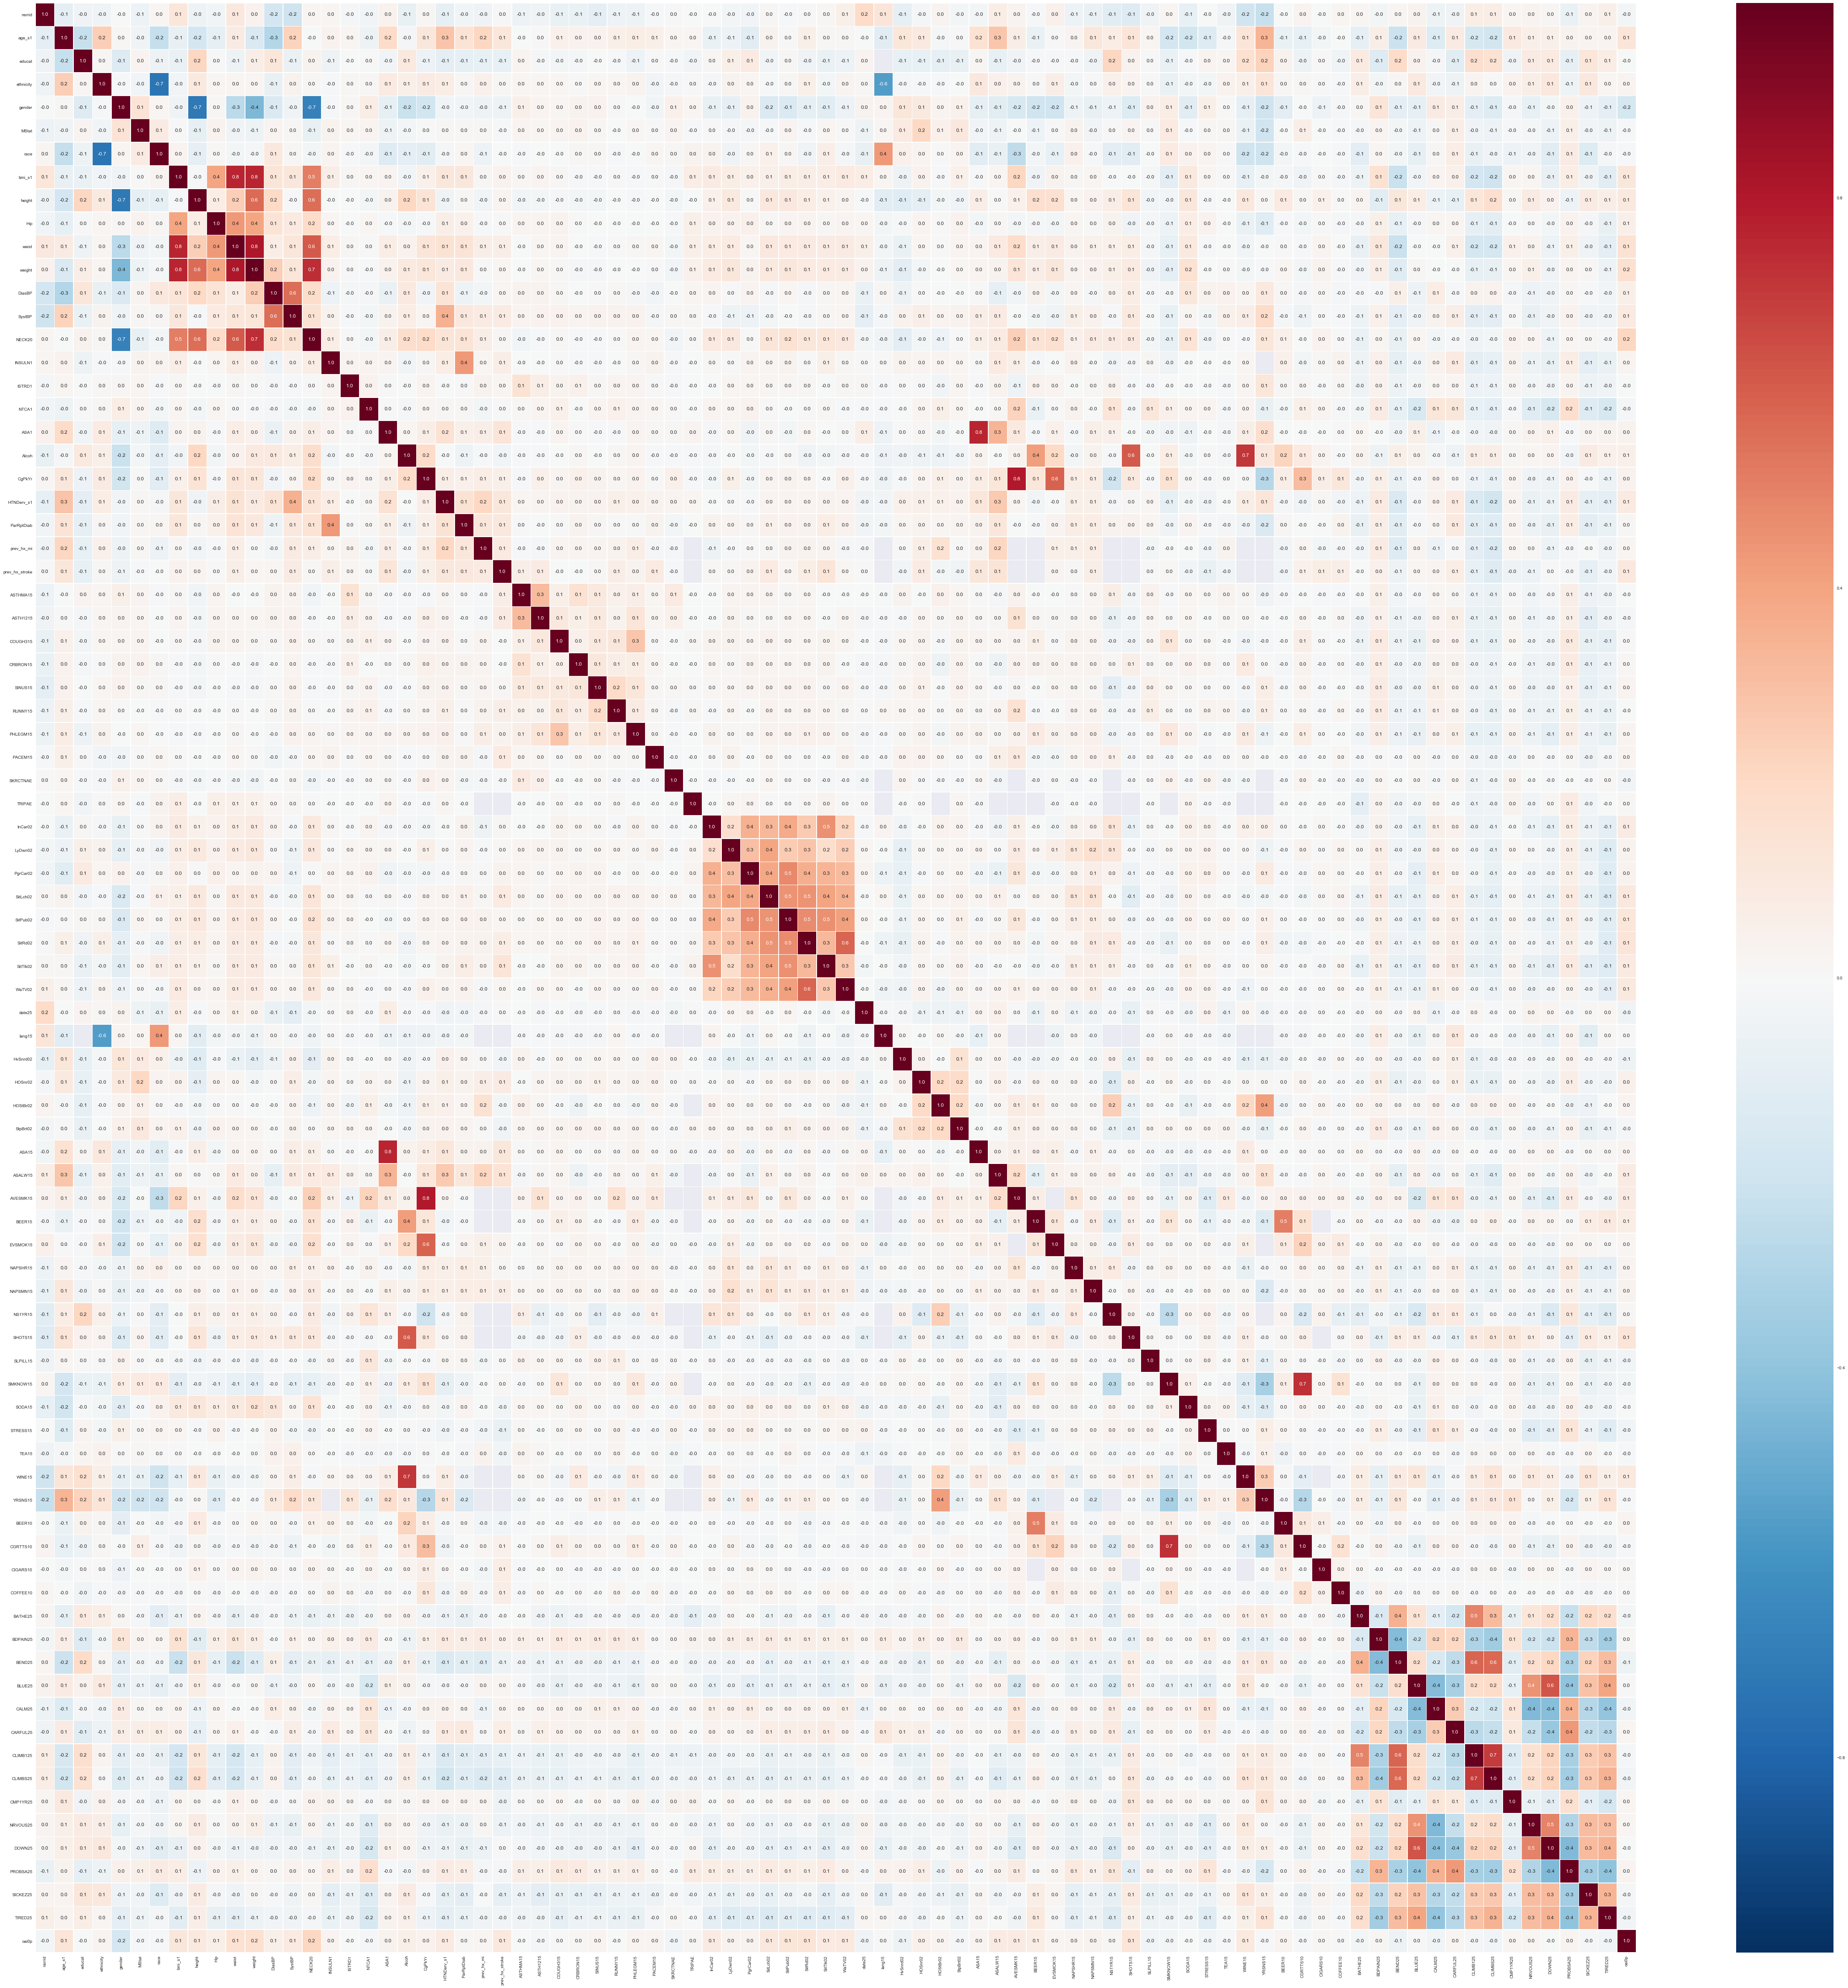

In [23]:
import seaborn as sns
f,ax = plt.subplots(figsize=(DataClean.shape[1], DataClean.shape[1]))
heatmapData = sns.heatmap(DataClean.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [24]:
fig = heatmapData.get_figure()
fig.savefig("/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/figure/heatmap.png")

In [36]:
# compare NaN counts between highly correlated features [> 0.7]
print('CgPkYr: ' + str(NaNcount['CgPkYr']) + ' v.s. EVSMOK15:  ' + str(NaNcount['EVSMOK15']))
print('ASA15: ' + str(NaNcount['ASA15']) + ' v.s. ASA1:  ' + str(NaNcount['ASA1']))
print('race: ' + str(NaNcount['race']) + ' v.s. ethnicity:  ' + str(NaNcount['ethnicity']))
print('waist: ' + str(NaNcount['waist']) + ' v.s. height:  ' + str(NaNcount['height']) + ' v.s. bmi_s1:  ' + str(NaNcount['bmi_s1']))
print('CLIMBS25: ' + str(NaNcount['CLIMBS25']) + ' v.s. CLIMB125:  ' + str(NaNcount['CLIMB125']))
# 	climb125	Quality of Life (QOL) (Sleep Heart Health Study Visit One (SHHS1)): Health limits climbing one flight of stairs
# Does your health now limit you in this activity, and if so, how much: Climbing one flight of stairs

# climbs25	Quality of Life (QOL) (Sleep Heart Health Study Visit One (SHHS1)): Health limits climbing several flights of stairs
# Does your health now limit you in this activity, and if so, how much: Climbing several flights of stairs

CgPkYr: 287 v.s. EVSMOK15:  31
ASA15: 37 v.s. ASA1:  15
race: 0 v.s. ethnicity:  0
waist: 333 v.s. height:  33 v.s. bmi_s1:  34
CLIMBS25: 387 v.s. CLIMB125:  397


In [37]:
# drop CgPkYr, ASA15, ethnicity, height, waist, CLIMB125
col2drop = ['CgPkYr', 'ASA15', 'ethnicity', 'weight', 'waist', 'CLIMB125']
DataClean = DataClean.drop(col2drop, axis=1)

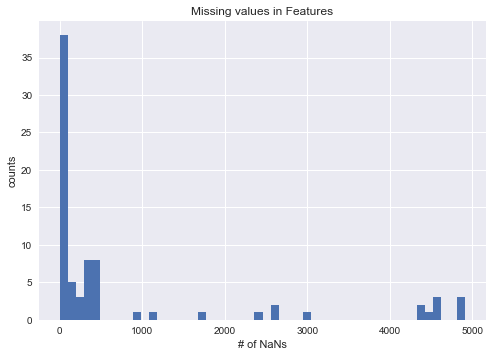

In [111]:
plt.hist(NaNcount, bins = 50)
plt.xlabel('# of NaNs')
plt.ylabel('counts')
plt.title('Missing values in Features')
fname='/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/figure/FeatureNaN_hist.pdf'
plt.savefig(fname)

In [38]:
NaNcount = DataClean.isnull().sum()
NaNcountROI = NaNcount.between(500, 2000)
# NaNcountROI = [NaNcountROI > 500]

In [39]:
NaNcount[NaNcountROI]

date25      978
lang15     1683
HOSnr02    1174
dtype: int64

In [40]:
# keep features with less than 600 missing values
DataClean = DataClean[NaNcount[NaNcount<1200].index.tolist()]
DataClean.shape

(5106, 65)

In [41]:
DataClean.head()

,nsrrid,educat,MStat,race,height,Hip,DiasBP,SystBP,INSULN1,ISTRD1,...,SICKEZ25,HvSnrd02,TIRED25,StpBrt02,SRHype,bmi_s1,age_s1,NECK20,gender,oai0p
0,200001,3.0,1.0,1,178.0,99.0,79.0,143.0,0.0,0.0,...,2.0,1.0,4.0,0.0,NaN,21.777553,55,38.3,1,0.319574
2,200003,3.0,3.0,1,145.0,95.0,68.0,127.0,0.0,0.0,...,5.0,8.0,4.0,8.0,1.0,24.114150,77,39.0,2,0.836820
3,200004,3.0,1.0,1,180.0,99.0,83.0,130.0,0.0,0.0,...,4.0,1.0,6.0,8.0,NaN,20.185185,48,39.2,1,1.196013
4,200005,2.0,3.0,2,155.0,97.0,78.0,145.0,0.0,0.0,...,5.0,1.0,5.0,8.0,NaN,23.309053,66,32.0,2,0.324324
5,200006,3.0,1.0,1,179.0,107.0,85.0,128.0,0.0,0.0,...,3.0,8.0,4.0,8.0,1.0,27.152711,63,39.0,1,2.790698


In [43]:
VarWUnknown = ['ASTH1215','ASTHMA15','COUGH315','CRBRON15','HOSnr02',
               'HvSnrd02','MStat','PACEM15','PHLEGM15','RUNNY15',
               'SINUS15','SLPILL15','StpBrt02','SRHype']

for col in range(len(VarWUnknown)):    
    DataClean[VarWUnknown[col]] = DataClean[VarWUnknown[col]].replace(8, np.nan)

In [42]:
for col in range(DataClean.columns.values.shape[0]):
    plt.hist(DataClean[DataClean.columns.values[col]].dropna(),color='k', alpha=0.5, bins=50)
    plt.title(DataClean.columns.values[col])
    plt.ylabel('counts')
    path = '/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/figure/raw/' + DataClean.columns.values[col] + '.pdf'
    plt.savefig(path)
    plt.cla()
    plt.clf()

In [44]:
# create STOP-BANG features
print(STOP_BANG)

['HvSnrd02', 'TIRED25', 'StpBrt02', 'SRHype', 'bmi_s1', 'age_s1', 'NECK20', 'gender']


(array([ 507.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3935.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

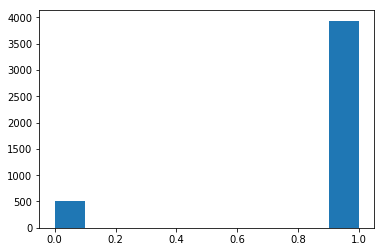

In [47]:
plt.hist(DataClean.HvSnrd02.dropna())

In [55]:
B = DataClean.bmi_s1 >35



In [56]:
DataClean['S'] = DataClean.HvSnrd02

T = DataClean.TIRED25 <5
T = T.astype(int)
DataClean['T'] = T

DataClean['O'] = DataClean.StpBrt02

DataClean['P'] = DataClean.SRHype

B = DataClean.bmi_s1 >35
B = B.astype(int)
DataClean['B'] = B

A = DataClean.age_s1 >50
A = A.astype(int)
DataClean['A'] = A

N = DataClean.NECK20 >40
N = N.astype(int)
DataClean['N'] = N

G = DataClean.gender == 1
G = G.astype(int)
DataClean['G'] = G

STOP_BANG =['HvSnrd02', 'T', 'StpBrt02', 'SRHype', 'bmi_s1', 'age_s1', 'NECK20', 'gender']

In [16]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(DataClean)
DataClean = imp.transform(DataClean)

In [57]:
# after examine histogram of each feature, I found several features require log transform
# which includes: bmi_s1, weight, Alcoh, CgPkYr, SODA15, TEA15, BDPAIN25
col2tf = ['bmi_s1', 'Alcoh', 'SODA15', 'TEA15', 'BDPAIN25']
for col in range(len(col2tf)):
    DataClean[col2tf[col]] = np.log(DataClean[col2tf[col]]+0.0001)
#     plt.hist(DataClean[col2tf[col]].dropna(),color='k', alpha=0.5, bins=50)
#     plt.title([col2tf[col]])
#     plt.ylabel('counts')
#     path = '/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/figure/raw/log/' + DataClean.columns.values[col] + '_transformed.pdf'
#     plt.savefig(path)
#     plt.cla()
#     plt.clf()

In [58]:
for col in range(HRV.columns.values.shape[0]):
    plt.hist(HRV[HRV.columns.values[col]].dropna(),color='k', alpha=0.5, bins=50)
    plt.title(HRV.columns.values[col])
    plt.ylabel('counts')
    path = '/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/figure/raw/HRV/' + HRV.columns.values[col] + '.pdf'
    plt.savefig(path)
    plt.cla()
    plt.clf()

In [6]:
toLogTrans = ['IHR', 'SDNN', 'SDANN', 'SDNNIDX',
       'rMSSD', 'pNN20', 'pNN30', 'pNN40', 'pNN50', 'tot_pwr',
       'ULF', 'VLF', 'LF', 'HF', 'LF_HF', 'HF_n']
for col in range(len(toLogTrans)):
    HRV[toLogTrans[col]] = np.log(HRV[toLogTrans[col]]+0.0001)
    plt.hist(HRV[toLogTrans[col]].dropna(),color='k', alpha=0.5, bins=50)
    plt.title([toLogTrans[col]])
    plt.ylabel('counts')
    path = '/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/figure/raw/HRV/log/' + HRV.columns.values[col] + '_transformed.pdf'
    plt.savefig(path)
    plt.cla()
    plt.clf()

In [60]:
HRV.head()

,nsrrid,NN_RR,AVNN,IHR,SDNN,SDANN,SDNNIDX,rMSSD,pNN10,pNN20,...,pNN40,pNN50,tot_pwr,ULF,VLF,LF,HF,LF_HF,LF_n,HF_n
0,200079,0.961807,837.411,4.271786,4.303981,3.569952,4.135566,3.820438,67.3536,3.640626,...,2.702046,2.415208,8.653223,7.333088,7.728508,7.127349,6.523125,0.604278,0.646622,-1.039934
1,200082,0.999420,1028.170,4.066566,4.504196,4.005772,4.167129,3.736090,73.7959,3.817822,...,2.744254,2.271610,9.097156,8.174134,8.197195,7.115964,6.253177,0.862831,0.703243,-1.214504
2,200108,0.998760,812.342,4.302180,4.399722,4.211920,3.688377,3.414364,52.3310,2.819848,...,1.189388,0.642496,8.875093,8.573296,6.936051,6.321975,5.626567,0.695460,0.667169,-1.099820
3,200109,0.993476,767.980,4.358337,3.657035,3.342226,3.078482,3.456184,31.0473,2.967384,...,2.588508,2.104452,7.244556,6.874463,5.231168,4.491649,5.055775,-0.563950,0.362593,-0.450190
4,200112,0.999960,969.661,4.125155,4.652627,3.696781,4.515667,4.498493,86.5691,4.267102,...,3.930057,3.786376,9.311461,7.732339,8.341608,7.989367,7.401793,0.587631,0.642808,-1.029203


In [61]:
DataClean.head()

,nsrrid,educat,MStat,race,height,Hip,DiasBP,SystBP,INSULN1,ISTRD1,...,gender,oai0p,T,S,O,P,B,A,N,G
0,200001,3.0,1.0,1,178.0,99.0,79.0,143.0,0.0,0.0,...,1,0.319574,1,1.0,0.0,NaN,0,1,0,1
2,200003,3.0,3.0,1,145.0,95.0,68.0,127.0,0.0,0.0,...,2,0.836820,1,NaN,NaN,1.0,0,1,0,0
3,200004,3.0,1.0,1,180.0,99.0,83.0,130.0,0.0,0.0,...,1,1.196013,0,1.0,NaN,NaN,0,0,0,1
4,200005,2.0,3.0,2,155.0,97.0,78.0,145.0,0.0,0.0,...,2,0.324324,0,1.0,NaN,NaN,0,1,0,0
5,200006,3.0,1.0,1,179.0,107.0,85.0,128.0,0.0,0.0,...,1,2.790698,1,NaN,NaN,1.0,0,1,0,1


In [19]:
DataClean_wHRV = DataClean.set_index('nsrrid').join(HRV.set_index('nsrrid'),
                                                    how = 'inner')

In [63]:
DataClean = DataClean.drop('oai0p',1)
DataClean.to_csv('/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/DataClean.csv')
TargetClean.to_csv('/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/TargetClean.csv')

In [20]:
DataClean_wHRV.to_csv('/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/DataClean_wHRV1.csv')

In [13]:
DataClean = pd.read_csv('/Users/hurdleman/Google Drive/Insight HD/Projects/Sleep Apnea/DataClean.csv')



In [15]:
idxid = DataClean.columns.values

In [17]:
DataClean = pd.DataFrame(data=DataClean, columns = idxid)

In [18]:
DataClean

,Unnamed: 0,nsrrid,educat,MStat,race,height,Hip,DiasBP,SystBP,INSULN1,...,NECK20,gender,T,S,O,P,B,A,N,G
0,0.0,200001.0,3.0,1.0,1.0,178.0,99.0,79.0,143.0,0.0,...,38.3,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2.0,200003.0,3.0,3.0,1.0,145.0,95.0,68.0,127.0,0.0,...,39.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3.0,200004.0,3.0,1.0,1.0,180.0,99.0,83.0,130.0,0.0,...,39.2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,200005.0,2.0,3.0,2.0,155.0,97.0,78.0,145.0,0.0,...,32.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5.0,200006.0,3.0,1.0,1.0,179.0,107.0,85.0,128.0,0.0,...,39.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
5,6.0,200007.0,3.0,1.0,1.0,178.0,112.0,99.0,142.0,0.0,...,43.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
6,7.0,200008.0,3.0,1.0,1.0,156.0,104.0,93.0,168.0,0.0,...,39.1,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7,8.0,200009.0,2.0,1.0,1.0,178.0,107.0,101.0,201.0,0.0,...,41.7,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
8,9.0,200010.0,3.0,1.0,1.0,178.0,114.0,105.0,141.0,0.0,...,41.8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
9,10.0,200011.0,3.0,1.0,1.0,152.0,104.0,89.0,143.0,0.0,...,35.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
# # add HOSnr02 back since from literature that snoring frequency is an important feature for opnea diagnosis
# pd.concat(frames)
